# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
columns_name=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'weight', 'Acceleration', 'Model Year', 'Origin']
df=pd.read_csv('auto-mpg.data', names=columns_name, na_values="?", comment='\t',
                sep=' ', skipinitialspace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [7]:
df.shape

(398, 8)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [11]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [27]:
df['Model Year']=df['Model Year']+1900

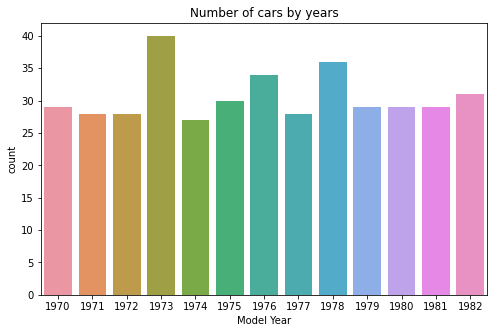

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='Model Year',data=df)
plt.title('Number of cars by years')
plt.show()

In [28]:
df['Origin'] = df['Origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

<AxesSubplot:ylabel='Origin'>

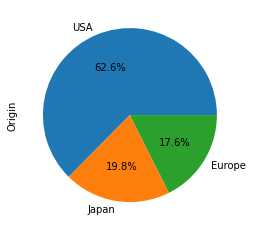

In [50]:
df['Origin'].value_counts().plot.pie(autopct='%1.1f%%')

In [12]:
df.nunique()

MPG             129
Cylinders         5
Displacement     82
Horsepower       93
weight          351
Acceleration     95
Model Year       13
Origin            3
dtype: int64

In [13]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [14]:
df.Horsepower.nunique()

93

In [16]:
df.Horsepower.isnull().sum()/df.shape[0]

0.01507537688442211

In [29]:
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum().sum()

0

In [23]:
def correlation(df, size=[10, 7]):
    f, ax = plt.subplots(figsize= size)
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()

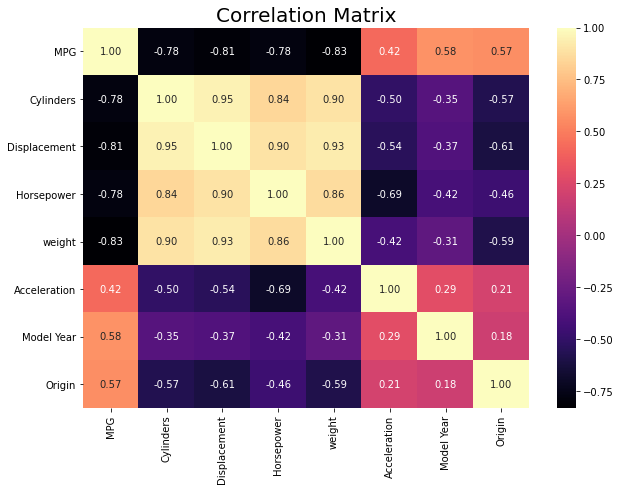

In [24]:
correlation(df)

In [30]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

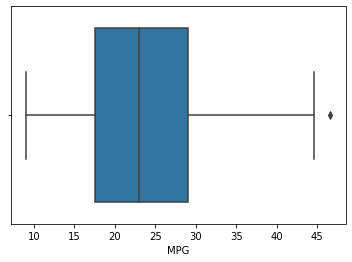

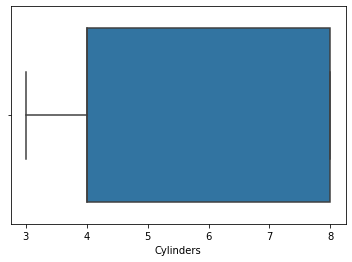

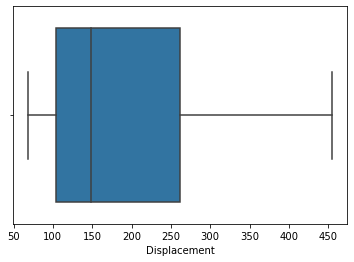

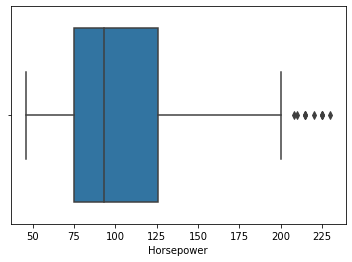

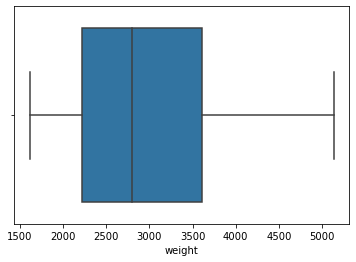

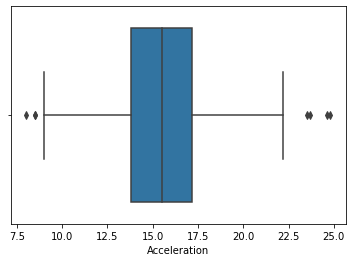

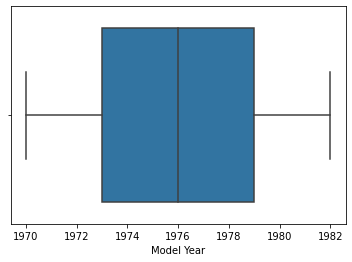

In [54]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

In [31]:
def outliers(df, col_name, q1=0.05, q3=0.95):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    return df[(df[col_name]>=low_limit) & (df[col_name]<=up_limit)]

In [32]:
df=outliers(df, 'Acceleration')

In [33]:
df=outliers(df, 'Horsepower')

# Encoding 

In [34]:
df=pd.get_dummies(df)

In [35]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,1970,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,1970,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,1970,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,1970,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,1970,0,0,1


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
def minmax_scaler(df, col_names, feature_range=(0,1)):
    minmax_scaler = MinMaxScaler(feature_range=feature_range)
    col_names=[col for col in col_names]
    df[col_names] = minmax_scaler.fit_transform(df[col_names])
    return df

In [38]:
num_cols=[col for col in df.columns if df[col].dtypes != "O"]

In [39]:
df=minmax_scaler(df, num_cols)

In [40]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


In [41]:
X=df.drop(['MPG'], axis=1)
Y=df['MPG']

# Model

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [42]:
def randomstate(x,y):
    min_error=100
    model=Lasso()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(ytest, p)
        if mse<min_error:
            min_error=mse
            j=i
    return j

In [43]:
rs=randomstate(X,Y)
rs

97

In [19]:
def reg_models(x, y, algo):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    algo.fit(X_train,Y_train)
    Y_train_pred=algo.predict(X_train)
    Y_test_pred=algo.predict(X_test)
    score=cross_val_score(algo,x,y,cv=10)
    train_error, train_score = mean_squared_error(Y_train, Y_train_pred), algo.score(X_train, Y_train)
    test_error,  test_score = mean_squared_error(Y_test, Y_test_pred), algo.score(X_test, Y_test)
    cross_score = np.round(score.mean(),4)
    print(type(algo).__name__)
    print('Train mse: {}'.format(train_error))
    print('Train Score: {}'.format(train_score))
    print('Test mse: {}'.format(test_error))
    print('Test Score: {}'.format(test_score))
    print('Mean of Cross Validation Score: {}'.format(cross_score))
    print('------------------------------------------------------')
    return (train_error, train_score, test_error,  test_score, cross_score)

In [20]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), 
            KNeighborsRegressor(n_neighbors=3), DecisionTreeRegressor(max_depth=2)]

In [44]:
for model in models:
    reg_models(X, Y, model)

LinearRegression
Train mse: 0.00796501391676203
Train Score: 0.8288833878297237
Test mse: 0.006609784288463035
Test Score: 0.7770091949677254
Mean of Cross Validation Score: 0.6421
------------------------------------------------------
Ridge
Train mse: 0.008250663147827391
Train Score: 0.8227466341215997
Test mse: 0.007125995035255676
Test Score: 0.7595940653704524
Mean of Cross Validation Score: 0.6313
------------------------------------------------------
Lasso
Train mse: 0.04654728617953311
Train Score: 0.0
Test mse: 0.03315450465057282
Test Score: -0.11851603014969858
Mean of Cross Validation Score: -0.9175
------------------------------------------------------
ElasticNet
Train mse: 0.04654728617953311
Train Score: 0.0
Test mse: 0.03315450465057282
Test Score: -0.11851603014969858
Mean of Cross Validation Score: -0.9175
------------------------------------------------------
KNeighborsRegressor
Train mse: 0.002717564598647669
Train Score: 0.9416171205305931
Test mse: 0.0077683838738

In [22]:
def light_gbm(df, Y):
    lgbm=LGBMRegressor()
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=rs, test_size=0.20)
    lgbm.fit(X_train, Y_train)

    Y_pred=lgbm.predict(X_test,num_iteration=lgbm.best_iteration_)

    print((mean_squared_error(Y_test, Y_pred)))

In [45]:
light_gbm(df,'MPG')

0.0073040417800176605


In [46]:
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}


X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=rs, test_size=0.20)

         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,Y_train,
                     eval_set = (X_test,Y_test),
                     plot=True,
                     verbose = False)


catf_pred = cat_model_f.predict(X_test)
test_rmse=np.sqrt(mean_squared_error(Y_test, catf_pred))
print('Test RMSE: ', test_rmse)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Test RMSE:  0.08029408169176952


# Model Tuning

In [47]:
def model_tuning(x, y, algo_cv, algo, alphas, test_size=0.20, cv=10):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=rs, test_size=test_size)
    model_cv=algo_cv(alphas=alphas, cv=cv)
    model_cv.fit(X_train, Y_train)
    model_tuned=algo(alpha=model_cv.alpha_)
    model_tuned.fit(X_train, Y_train)
    print(type(model_tuned).__name__)
    Y_train_pred=model_tuned.predict(X_train)
    train_rmse=mean_squared_error(Y_train, Y_train_pred)
    print("Train mse: {}".format(train_rmse))
    Y_test_pred=model_tuned.predict(X_test)
    test_rmse=mean_squared_error(Y_test, Y_test_pred)
    print("Test mse: {}".format(test_rmse))
    print('----------------------------------------')
    return (type(model_tuned).__name__, train_rmse, test_rmse)

In [48]:
cv_models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
results_tuned={'model':[], 'train_rmse':[], 'test_rmse':[]}
alphas = [0.1,0.01, 0.005, 0.05, 0.001,0.2,0.3,0.5,0.8,0.9,1]

In [49]:
for model in cv_models:
    res=model_tuning(X, Y, cv_models[model], model, alphas)
    results_tuned['model'].append(res[0])
    results_tuned['train_rmse'].append(res[1])
    results_tuned['test_rmse'].append(res[2])

Ridge
Train mse: 0.007866327719429633
Test mse: 0.006615914408743938
----------------------------------------
Lasso
Train mse: 0.00810239574509302
Test mse: 0.006609610800671738
----------------------------------------
ElasticNet
Train mse: 0.008086778207778932
Test mse: 0.006689336551150602
----------------------------------------


In [50]:
def light_gbm_tuning(df, Y):
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.20)
    lgbm_grid={
    'colsample_bytree':[0.4, 0.5, 0.6, 0.9, 1],
    'learning_rate':[0.01, 0.1, 0.5, 1],
           'n_estimators':[20, 40, 100, 200, 500, 1000],
           'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]}

    lgbm=LGBMRegressor()

    lgbm_cv_model=GridSearchCV(lgbm, lgbm_grid, cv=10,
                           n_jobs=-1, verbose=2)

    lgbm_cv_model.fit(X_train, Y_train)

    #lgbm_cv_model.best_params_
    lgbm_tuned=LGBMRegressor(learning_rate=0.1,
                         max_depth=2,
                         n_estimators=100,
                         colsample_bytree=0.9)

    lgbm_tuned.fit(X_train, Y_train)

    Y_pred=lgbm_tuned.predict(X_test)

    print(mean_squared_error(Y_test, Y_pred))

# Final Model

In [52]:
light_gbm_tuning(df, 'MPG')

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
0.004724807003775202
